In [1]:
import os
import pandas as pd
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Data Processing
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.metrics import roc_curve, roc_auc_score
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import warnings
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.inspection import permutation_importance
import warnings


In [2]:

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [3]:
# Chemin vers le répertoire contenant les fichiers CSV
dir_path = "ref"

In [4]:
# Liste des noms de fichiers CSV dans le répertoire
file_names = [f for f in os.listdir(dir_path) if f.endswith('.csv')]
print(file_names)

['2023-05-17.0010 CHO apoptic.fcs.csv', '2023-05-30.0071 RE live dead.fcs.csv', '2023-04-03.0026 CHO dead.fcs.csv', '2023-05-17.0118 HEK apoptic.fcs.csv', '2023-05-17.0013 CHO apoptic.fcs.csv', '2023-05-11.0027 RE dead.fcs.csv', '2023-04-03.0025 CHO live.fcs.csv', '2023-04-11.0016 OE dead.fcs.csv', '2023-05-17.0021 HEK apoptic.fcs.csv', '2023-05-17.0119 HEK apoptic.fcs.csv', '2023-05-30.0072 RE live dead.fcs.csv', '2023-04-11.0028 Trachea.fcs.csv', '2023-04-13.0022 Monocyte.fcs.csv', '2023-05-11 Monocyte dead.0029.fcs.csv', '2023-04-03.0020 CHO live.fcs.csv', '2023-05-08.0009 RE live apoptic.fcs.csv', '2023-04-05.0022 CGB live.fcs.csv', '2023-04-03.0027 CHO dead.fcs.csv', '2023-05-08.0022 Trachea.fcs.csv', '2023-04-03.0029 CHO dead.fcs.csv', '2023-05-08.0023 Trachea.fcs.csv', '2023-04-03.0023 CHO live.fcs.csv', '2023-05-11.0016 OE dead.fcs.csv', '2023-04-11.0026 OE dead.fcs.csv', '2023-05-17.0024 HEK apoptic.fcs.csv', '2023-04-11.0030 Trachea dead.fcs.csv', '2023-04-11.0013 OE dead.fcs

In [5]:
# Liste des DataFrames chargés à partir des fichiers CSV
dfs = []
for file_name in file_names:
    file_path = os.path.join(dir_path, file_name)
    df = pd.read_csv(file_path)
    df = df.drop(df.columns[[0,-2,-3]], axis=1)
    dfs.append(df)

In [6]:
# Concaténer les DataFrames en un seul DataFrame
df_concat = pd.concat(dfs)

In [7]:
# Afficher les 5 premières lignes du DataFrame concaténé
print(df_concat.head())
print(df_concat.columns)
print(df_concat)

       FSC-A      FSC-H      FSC-W      SSC-A      SSC-H      SSC-W  \
0  394.29376  80.827190  2439.1160  4529.6426  933.72760  2425.5696   
1  395.18950  80.802155  2445.4146  4474.8843  925.70970  2417.0020   
2  394.10535  80.860930  2436.9329  4424.9316  917.59410  2411.1594   
3  385.85257  79.308080  2432.6182  4388.1035  908.90330  2413.9550   
4  387.98016  87.208855  2224.4312  4106.3306  844.16974  2432.1711   

   VioBlue-A  VioBlue-H  VioBlue-W  Calcein-A  Calcein-H   Calcein-W  \
0   4.277882   1.093906  1955.3248   1.466722   0.641955  1142.38640   
1   3.999039   1.015756  1968.5028   1.502470   0.698992  1074.74050   
2   3.614107   1.038328  1740.3489   1.345920   0.737081   913.00710   
3   3.554087   0.929894  1911.0176   1.323871   0.702652   942.05316   
4   2.867292   0.830394  1726.4636   1.444936   0.594517  1215.21770   

       PI-A      PI-H       PI-W         label  
0  1.262902  0.483145  1306.9610  Noise points  
1  1.233343  0.531162  1160.9866  Noise po

In [8]:
# Utiliser la méthode isna() pour vérifier chaque cellule du dataframe
nan_df = df_concat.isna()

# Utiliser la méthode sum() pour compter le nombre total de valeurs NaN
nb_nan = nan_df.sum().sum()

print(nb_nan)  # Affiche 3

0


In [9]:
# Sélectionner les colonnes à utiliser pour l'arbre de décision
feature_cols = list(df_concat.columns[:-1])

In [10]:
# Sélectionner la colonne cible pour l'arbre de décision
target_col = df_concat.columns[-1]

In [11]:
# Diviser le DataFrame en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df_concat[feature_cols], df_concat[target_col], test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape)

(777498, 15) (777498,) (194375, 15)


In [12]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

scorer = make_scorer(f1_score, average = 'weighted')

In [13]:
# create the grid
#n_estimators = [10, 100,200]
n_estimators=[100]
#max_depth = [2,3,4]
#max_depth = [20]
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }


#params = {'max_features': ['sqrt', 'log2', None],'n_estimators': [25, 50, 100, 150],'max_depth': [3, 6, 9],'max_leaf_nodes': [3, 6, 9]}
params = {"n_estimators":[100], "max_depth":[10], 'max_features':[7],'min_samples_leaf':[1],'min_samples_split':[2]}

In [14]:
# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)

In [15]:
rfc_cv = GridSearchCV(rfc,params, scoring=scorer, n_jobs=-1, verbose=1, cv=2)

In [16]:

rfc_cv.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': [7],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [100]},
             scoring=make_scorer(f1_score, average=weighted), verbose=1)

In [ ]:
print(rfc_cv.best_estimator_)
print(f"Best parameters: {rfc_cv.best_params_}")
print(rfc_cv.best_score_)

RandomForestClassifier(max_depth=10, max_features=7, random_state=0)
Best parameters: {'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.87177190682312


In [ ]:
# # fit the model
best_params = rfc_cv.best_params_
best_rf= RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)




RandomForestClassifier(max_depth=10, max_features=7)

In [ ]:
class_names = df_concat[target_col].unique()
print(class_names)

['Noise points' 'CHO cells: Apoptic ' 'RE cells: Live' 'RE cells: Dead '
 'CHO cells: Dead ' 'HEK cells: Apoptic ' 'CHO cells: Live'
 'OE cells: Dead ' 'Trachea cells: Dead ' 'Monocyte cells: Apoptic '
 'Monocyte cells: Live' 'Monocyte cells: Dead ' 'RE cells: Apoptic '
 'CGB cells: Live' 'Trachea cells: Apoptic ' 'Trachea cells: Live'
 'OE cells: Apoptic ' 'OE cells: Live' 'CGB cells: Dead '
 'HEK cells: Dead ']


In [ ]:
# # Predict the Test set results

y_pred = best_rf.predict(X_test)
print(y_pred)
print(classification_report(y_pred, y_test))

['OE cells: Dead ' 'Monocyte cells: Apoptic ' 'Monocyte cells: Dead ' ...
 'CHO cells: Dead ' 'CHO cells: Dead ' 'HEK cells: Apoptic ']


/opt/bwhpc/common/jupyter/tensorflow/2023-03-24/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/bwhpc/common/jupyter/tensorflow/2023-03-24/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

        CGB cells: Dead        0.92      0.72      0.81      2332
         CGB cells: Live       0.97      0.98      0.98      3823
     CHO cells: Apoptic        0.97      0.97      0.97     14001
        CHO cells: Dead        0.86      0.82      0.84     17447
         CHO cells: Live       0.96      0.99      0.97     28626
     HEK cells: Apoptic        0.95      0.90      0.92     13077
        HEK cells: Dead        0.79      0.83      0.81     11226
Monocyte cells: Apoptic        0.94      0.90      0.92     10864
   Monocyte cells: Dead        0.88      0.91      0.90     13296
    Monocyte cells: Live       0.00      0.00      0.00         0
            Noise points       0.97      0.95      0.96     31065
      OE cells: Apoptic        0.92      0.77      0.84     11051
         OE cells: Dead        0.72      0.70      0.71     11296
          OE cells: Live       0.92      0.66      0.77      7260
      RE 

/opt/bwhpc/common/jupyter/tensorflow/2023-03-24/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.8774


In [ ]:
# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cnf_matrix)

Confusion matrix

 [[ 1674     0     0     0    12    55     0     0     0     0    66     0
      3     0     0     3     2     0     0     0]
 [    0  3753     0     0    63    17     0    15     3     0     4     0
      3     5     0     0     4     0     0     0]
 [   16     0 13627     0     4   407     0     0    20     0    19     0
      6     0     0     0     1     0     0     0]
 [   23     0     0 14384    16    72  1413     0   362     0   350     0
     42     0     0    74     4     0     4     0]
 [   58    29     0    39 28231    52    16    99    34     0   209     4
    218    21     0   189    12     0   128     0]
 [  161     0   240     1     2 11809     2    27    38     0   179     0
     27     0     0     1     4     0     0     0]
 [   58     0     1  2097     1     7  9320     0   180     0    92     0
     26     0     0    57     0     0     0     0]
 [   19     6     6     5    40    30     4  9728    70     0    25    93
     68   168     0    64    13 

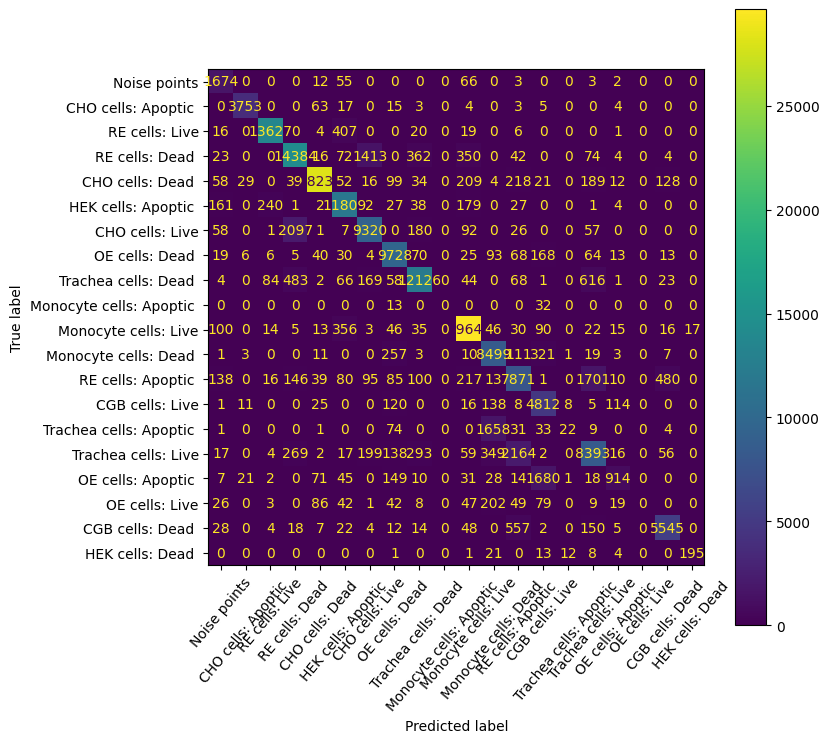

/opt/bwhpc/common/jupyter/tensorflow/2023-03-24/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/bwhpc/common/jupyter/tensorflow/2023-03-24/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

        CGB cells: Dead        0.72      0.92      0.81      1815
         CGB cells: Live       0.98      0.97      0.98      3867
     CHO cells: Apoptic        0.97      0.97      0.97     14100
        CHO cells: Dead        0.82      0.86      0.84     16744
         CHO cells: Live       0.99      0.96      0.97     29339
     HEK cells: Apoptic        0.90      0.95      0.92     12491
        HEK cells: Dead        0.83      0.79      0.81     11839
Monocyte cells: Apoptic        0.90      0.94      0.92     10352
   Monocyte cells: Dead        0.91      0.88      0.90     13745
    Monocyte cells: Live       0.00      0.00      0.00        45
            Noise points       0.95      0.97      0.96     30456
      OE cells: Apoptic        0.77      0.92      0.84      9246
         OE cells: Dead        0.70      0.72      0.71     10992
          OE cells: Live       0.66      0.92      0.77      5258
      RE 

/opt/bwhpc/common/jupyter/tensorflow/2023-03-24/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))


disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=class_names)
disp.plot(ax=ax, xticks_rotation=50, values_format='d')



plt.show()

print(classification_report(y_test, y_pred))



In [ ]:
print_score(best_rf, X_train, y_train, X_test, y_test, train=True)
print_score(best_rf, X_train, y_train, X_test, y_test, train=False)

/opt/bwhpc/common/jupyter/tensorflow/2023-03-24/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/bwhpc/common/jupyter/tensorflow/2023-03-24/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/bwhpc/common/jupyter/tensorflow/2023-03-24/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Train Result:
Accuracy Score: 88.02%
_______________________________________________
CLASSIFICATION REPORT:
           CGB cells: Dead   CGB cells: Live  CHO cells: Apoptic   \
precision          0.699201         0.984251             0.976364   
recall             0.932847         0.976686             0.969719   
f1-score           0.799300         0.980454             0.973030   
support         6850.000000     15613.000000         56273.000000   

           CHO cells: Dead   CHO cells: Live  HEK cells: Apoptic   \
precision          0.832139         0.986548             0.907487   
recall             0.861772         0.962716             0.945174   
f1-score           0.846696         0.974486             0.925947   
support        67085.000000    117235.000000         50013.000000   

           HEK cells: Dead   Monocyte cells: Apoptic   Monocyte cells: Dead   \
precision          0.833454                  0.901788               0.913737   
recall             0.796550             

/opt/bwhpc/common/jupyter/tensorflow/2023-03-24/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/bwhpc/common/jupyter/tensorflow/2023-03-24/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/bwhpc/common/jupyter/tensorflow/2023-03-24/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Test Result:
Accuracy Score: 87.74%
_______________________________________________
CLASSIFICATION REPORT:
           CGB cells: Dead   CGB cells: Live  CHO cells: Apoptic   \
precision          0.717839         0.981690             0.973288   
recall             0.922314         0.970520             0.966454   
f1-score           0.807331         0.976073             0.969859   
support         1815.000000      3867.000000         14100.000000   

           CHO cells: Dead   CHO cells: Live  HEK cells: Apoptic   \
precision          0.824440         0.986201             0.903036   
recall             0.859054         0.962235             0.945401   
f1-score           0.841391         0.974071             0.923733   
support        16744.000000     29339.000000         12491.000000   

           HEK cells: Dead   Monocyte cells: Apoptic   Monocyte cells: Dead   \
precision          0.830216                  0.895434               0.912004   
recall             0.787229              

In [ ]:
# Créer un objet graphviz pour visualiser l'arbre de décision
#dot_data = export_graphviz(best_rf, out_file=None, feature_names=feature_cols, filled=True, rounded=True, special_characters=True,class_names =class_names)
dot_data = export_graphviz(best_rf.estimators_[0], out_file=None, feature_names=feature_cols,
                           class_names=class_names, filled=True, rounded=True,
                           special_characters=True)

In [ ]:
# Transformer le fichier .dot en une image représentant l'arbre de décision

display(dot_data)

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=<SSC-H &le; 564.264<br/>gini = 0.912<br/>samples = 491954<br/>value = [6933, 15757, 56177, 67047, 116882, 50353, 47218, 40709<br/>55155, 186, 122224, 37370, 43682, 20835, 7568, 48511<br/>12242, 2244, 25274, 1131]<br/>class = Monocyte cells: Live>, fillcolor="#fdfeff"] ;\n1 [label=<PI-A &le; 1.046<br/>gini = 0.913<br/>samples = 419165<br/>value = [6927, 15751, 56142, 67012, 116869, 50222, 47206, 40703<br/>55130, 186, 7612, 37366, 43528, 20833, 7568, 48456<br/>12224, 2223, 25265, 1131]<br/>class = CHO cells: Dead >, fillcolor="#f4fdee"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<FSC-A &le; 30.762<br/>gini = 0.386<br/>samples = 85485<br/>value = [27, 15536, 35, 264, 104203, 177, 50, 504, 354, 0<br/>967, 371, 192, 6785, 5, 87, 4771, 425, 122, 1]<br/>class = CHO cells: Dead >, fillcolor="#9dec6c"] ;\n1 -> 2 ;\n3 [label=<C

In [ ]:
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Sauvegarder le graphique dans un fichier PNG
#graph.render(filename='random_forest_tree', format='png')

In [ ]:
# feature importance
feature_scores = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores)

PI-H         0.192758
SSC-A        0.135156
PI-A         0.122961
SSC-H        0.120351
Calcein-H    0.094687
VioBlue-H    0.057905
SSC-W        0.052758
Calcein-A    0.050134
FSC-H        0.047868
FSC-A        0.044311
FSC-W        0.038544
VioBlue-A    0.026752
Calcein-W    0.010183
PI-W         0.003638
VioBlue-W    0.001996
dtype: float64


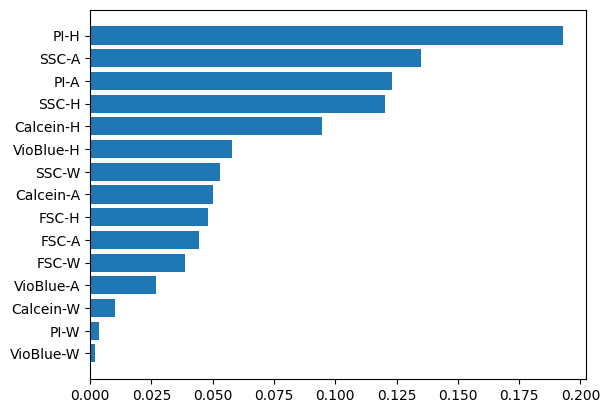

In [ ]:
f_i = list(zip(X_train.columns,best_rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [ ]:
# permutation feature
perm_importance = permutation_importance(best_rf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()


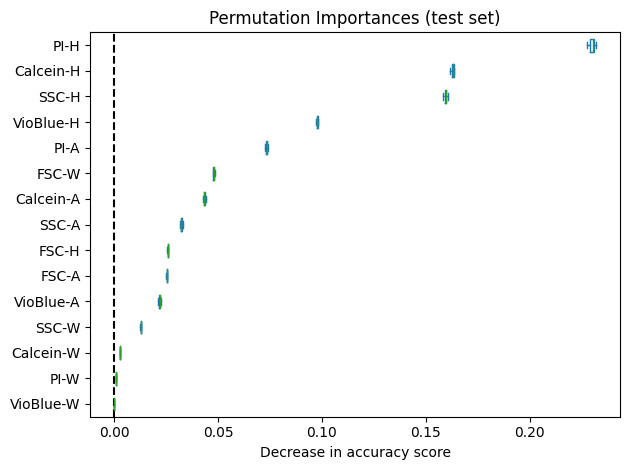

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    best_rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
# Cross validate model with Kfold stratified cross val
from sklearn.model_selection import StratifiedKFold
K_fold = StratifiedKFold(n_splits=10)

In [ ]:

from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import learning_curve    

scores = cross_val_score(best_rf, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

In [ ]:
y_score = best_rf.predict_proba(X_test)
print(y_score)
print('roc_auc_score for Random forest: ', roc_auc_score(y_test, y_score,multi_class='ovr'))

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
plot_learning_curve(estimator = best_rf ,title = "Random forest - Learning Curve",
                    X = X_train, y = y_train, cv = K_fold);

In [ ]:
X=df_concat[feature_cols]
y=df_concat[target_col]
random_state = np.random.RandomState(0)

In [ ]:
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
print(f"{n_classes} classes")


In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
print(y_onehot_test.shape)  # (n_samples, n_classes)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

In [ ]:
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

In [ ]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

In [ ]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

In [ ]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {class_names[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()